In [6]:
from IPython.display import Image

In [7]:
import torch
from torch.autograd import Variable

## multi head (output/branch) architecture

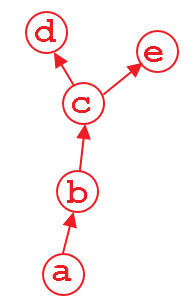

In [8]:
Image('./imgs/multi_loss.PNG')

In [9]:
a = Variable(torch.rand(1, 4), requires_grad=True)
b = a**2
c = b*2

d = c.mean()
e = c.sum()


d.backward()

# RuntimeError: Trying to backward through the graph a second time
e.backward()

RuntimeError: Trying to backward through the graph a second time (or directly access saved tensors after they have already been freed). Saved intermediate values of the graph are freed when you call .backward() or autograd.grad(). Specify retain_graph=True if you need to backward through the graph a second time or if you need to access saved tensors after calling backward.

- when we do d.backward(), that is fine. 
- After this computation, the parts of the graph that calculate **d will be freed by default to save memory**. 
- So if we do e.backward(), the error message will pop up. In order to do e.backward(), we have to set the parameter retain_graph to True in d.backward(), i.e.,

## retain graph

In [10]:
a = Variable(torch.rand(1, 4), requires_grad=True)
b = a**2
c = b*2

d = c.mean()
e = c.sum()


d.backward(retain_graph=True)

# RuntimeError: Trying to backward through the graph a second time
e.backward()

## retain graph 下的梯度计算

In [11]:
a = Variable(torch.tensor([1., 2., 3., 4.]), requires_grad=True)
b = a**2
c = b*2

# scalar
d = c.mean()
e = c.sum()


d.backward(retain_graph=True)
# tensor([1., 2., 3., 4.])
print(a.grad)
e.backward()
# 两次 backwward 累加
# tensor([ 5., 10., 15., 20.])
print(a.grad)

tensor([1., 2., 3., 4.])
tensor([ 5., 10., 15., 20.])


- $d=\frac{\sum_i2a_i^2}4$
    - $\frac{\partial d}{\partial a_i}=a_i$
- $e=\sum_i2a_i^2$
    - $\frac{\partial e}{\partial a_i}=4a_i$

## multi loss

In [ ]:
# suppose you first back-propagate loss1, then loss2 (you can also do the reverse)
l1.backward(retain_graph=True)
l2.backward() # now the graph is freed, and next process of batch gradient descent is ready

optimizer.step() # update the network parameters